In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

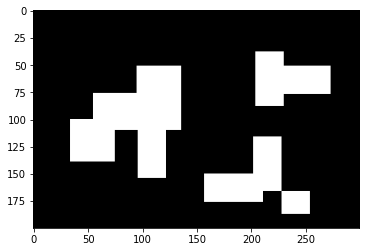

In [2]:
img = cv2.imread("../seg.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
def labeling_4(img):
    H, W, _ = img.shape
    img_pad = np.zeros((H+2, W+2, 3))
    for i in range(3):
        img_pad[..., i] = np.pad(img[..., i], (1, 1), "edge")
    ids = np.ones((H+2, W+2)) * np.inf
    
    LUT = [0 for i in range(H*W)]
    last_id = -1
    for i in range(1, H+1):
        for j in range(1, W+1):
            if (img_pad[i, j, :] == np.array([255, 255, 255])).all():
                id1 = ids[i-1, j]
                id2 = ids[i, j-1]
                if np.min([id1, id2]) == np.inf:
                    ids[i, j] = last_id + 1
                    LUT[ last_id + 1 ] = last_id + 1
                    last_id += 1
                else:
                    min_id = np.min([id1, id2]).astype("int32")
                    max_id = np.max([id1, id2]).astype("int32")
                    ids[i, j] = min_id
                    if np.max([id1, id2]) != np.inf:
                        LUT[max_id] = np.min([ LUT[max_id], LUT[min_id] ])
    
    img_out = np.zeros_like(img)
    id_to_color = [
        [0, 0, 255],
        [0, 255, 0],
        [255, 0, 0],
        [255, 255, 0]
    ]
    
    new_lut_id = 0
    for l in range(last_id+1):
        exist = False
        for i in range(last_id+1):
            if LUT[i] == l:
                LUT[i] = new_lut_id
                exist = True
                
        if exist:
            new_lut_id += 1
    
    for i in range(1, H+1):
        for j in range(1, W+1):
            if ids[i, j] != np.inf:
                img_out[i-1, j-1, :] = id_to_color[ LUT[ ids[i, j].astype("int32") ] ]
                        
    return img_out

In [8]:
img_labeling = labeling_4(img)
plt.imshow(cv2.cvtColor(img_labeling, cv2.COLOR_BGR2RGB))
plt.show()

IndexError: list index out of range